# 03 Modeling

The problem is modelled by **k-means clustering** algorithm. The reasoning behind is the following:  
- The nature of k-means clustering with Euclidian distance is putting the most similar/closest objects together. Consequently, the t-shirt representing the cluster should fit all the members reasonably.
- Hyperparameter k is used together with clustering metric and elbow method to estimate the range of the reasonable number of sizes. The result is then being checked with the client.
- For each size, which is represented by one cluster, the size is defined by cluster centroid.

# GENERAL SETTINGS --------------------------------------

## Initial Timestamp

In [1]:
import time
print("Date and Time of Starting Execution: " + time.strftime("%d/%m/%Y") + " " +time.strftime("%X"))

global_start_time = time.time()

Date and Time of Starting Execution: 01/01/2022 16:35:01


## Libraries

In [2]:
#general libraries
import pandas as pd
import configparser
from sklearn.cluster import KMeans

%matplotlib inline

In [3]:
#personal libraries
from Code.Visualization import Visualizer

## Notebook Settings

In [4]:
CLEAN_DATA_FILE = "clean_data.pkl"
K_MEANS_RANDOM_STATE = 87302

# ANALYSIS ---------------------------------------------------------

## Reading Data for Modelling

The cleaned data from previous notebook *02-02 Exploratory Data Analysis* will be used. Please see the notebook for more details.

In [5]:
#data reading
clean_data = pd.read_pickle(CLEAN_DATA_FILE)

In [6]:
#checking
print(clean_data.shape)
print(clean_data.describe())
print(clean_data.head())
print(clean_data.tail())

(200, 3)
       NumberOfObservation  Width [cm]  Length [cm]
count           200.000000  200.000000   200.000000
mean            100.500000   51.074100    68.163050
std              57.879185   10.302146     4.309925
min               1.000000   27.370000    55.960000
25%              50.750000   43.900000    65.057500
50%             100.500000   48.855000    67.695000
75%             150.250000   57.762500    70.547500
max             200.000000   85.360000    81.760000
   NumberOfObservation  Width [cm]  Length [cm]
0                    1       45.99        66.25
1                    2       43.64        66.15
2                    3       56.83        69.12
3                    4       53.90        66.27
4                    5       35.87        70.38
     NumberOfObservation  Width [cm]  Length [cm]
195                  196       47.79        67.78
196                  197       43.31        67.59
197                  198       62.48        68.96
198                  199       58.6

## K-Means Clustering

[scikit-learn k-means documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

### Fitting and Plotting One Case

In [7]:
#creating clustering object
kmeans_model = KMeans(n_clusters = 9, random_state=K_MEANS_RANDOM_STATE)

In [8]:
#estimating model
kmeans_model.fit(clean_data[["Width [cm]","Length [cm]"]])

KMeans(n_clusters=9, random_state=87302)

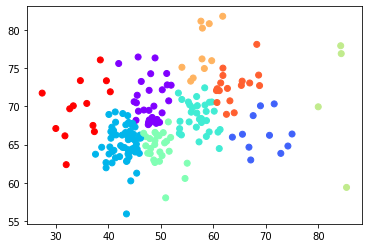

In [9]:
#visualization of the result
visu = Visualizer()
visu.plot_clusters(clean_data["Width [cm]"], clean_data["Length [cm]"], kmeans_model.labels_)

### Interpretation with Respect to Question

For given k in k-means, the following information is needed to answer our questions:
* Centers of the clusters - these are the desired size of the t-shirt.
* Respective cluster for each observation - important for studying the groups. 
* Quality metric of clustering - for comparing different clusterings - see bellow.

In [10]:
#centers of the clusters - it is the desired size of the t-shirt.
kmeans_model.cluster_centers_

array([[47.93266667, 70.64266667],
       [69.43818182, 66.40727273],
       [42.90736842, 65.11596491],
       [57.153125  , 68.6196875 ],
       [49.70961538, 64.52692308],
       [83.4825    , 71.0375    ],
       [57.807     , 77.306     ],
       [63.74882353, 72.59529412],
       [34.63230769, 69.72153846]])

In [11]:
#respective cluster for each observation
kmeans_model.labels_

array([2, 2, 3, 3, 8, 0, 6, 4, 7, 2, 4, 3, 2, 4, 8, 7, 2, 0, 3, 0, 2, 0,
       0, 7, 8, 6, 2, 4, 4, 2, 2, 3, 8, 2, 8, 4, 1, 3, 4, 0, 2, 7, 1, 2,
       3, 3, 0, 6, 6, 3, 4, 3, 5, 2, 0, 4, 1, 2, 0, 3, 4, 4, 3, 2, 3, 2,
       0, 2, 0, 3, 6, 3, 0, 0, 3, 0, 2, 2, 7, 2, 2, 2, 1, 0, 2, 2, 0, 4,
       4, 2, 5, 0, 2, 8, 2, 1, 3, 0, 8, 0, 2, 4, 7, 7, 0, 4, 4, 2, 7, 1,
       2, 1, 0, 2, 4, 4, 3, 3, 7, 6, 0, 3, 7, 0, 3, 2, 7, 2, 2, 8, 2, 2,
       2, 2, 2, 3, 3, 4, 2, 6, 3, 5, 0, 8, 3, 6, 2, 2, 4, 1, 3, 1, 3, 0,
       3, 4, 2, 2, 2, 2, 7, 7, 1, 3, 4, 1, 2, 2, 2, 3, 2, 4, 0, 2, 2, 7,
       7, 4, 0, 8, 8, 2, 4, 2, 4, 2, 3, 2, 0, 7, 6, 8, 5, 6, 8, 0, 2, 7,
       3, 0])

In [12]:
#"quality" metric for clustering - score
kmeans_model.inertia_

2546.5020667194985

### Finding Answer to Client's Question

Now it is time to study the question in a more general manner. We have to advise the company, how many sizes should they produce. We use the `k` in the k-means algorithm as a parameter and study the clustering behaviour with respect to changes in `k`.

In [13]:
k_params = range(2,21)
metrics = [0]  * len(k_params)
i=0
for k in k_params:
    kmeans_model = KMeans(n_clusters = k, random_state=K_MEANS_RANDOM_STATE)
    kmeans_model.fit(clean_data[["Width [cm]","Length [cm]"]])
    metrics[i]=kmeans_model.inertia_
    i=i+1

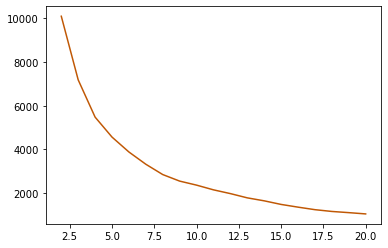

In [14]:
visu.plot_metric(k_params, metrics)

## Getting Results for Selected k

In [15]:
#parameters
number_of_sizes = 7

In [16]:
#creating clustering object and fitting
kmeans_model = KMeans(n_clusters = number_of_sizes, random_state=K_MEANS_RANDOM_STATE)
kmeans_model.fit(clean_data[["Width [cm]","Length [cm]"]])

KMeans(n_clusters=7, random_state=87302)

In [17]:
#centers of the clusters - it is the desired size of the t-shirt.
print()
print(f"For {number_of_sizes} sizes, the sizes are defined as follows:")
kmeans_model.cluster_centers_


For 7 sizes, the sizes are defined as follows:


array([[68.39722222, 69.08833333],
       [42.94775862, 65.1687931 ],
       [49.77463415, 65.73390244],
       [83.4825    , 71.0375    ],
       [47.72333333, 72.31055556],
       [34.63230769, 69.72153846],
       [58.51604167, 71.29208333]])

## Final Timestamp

In [18]:
print("Date and Time of Ending Execution: " + time.strftime("%d/%m/%Y") + " " +time.strftime("%X"))
print("Time duration of whole notebook is: " + str(round((time.time() - global_start_time)/60, 3)) + " seconds")

Date and Time of Ending Execution: 01/01/2022 16:35:04
Time duration of whole notebook is: 0.054 seconds
